In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [3]:
#Import the data
data = pd.read_csv("teleCust1000t.csv")
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
#Let's see how many classes we have gat
data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

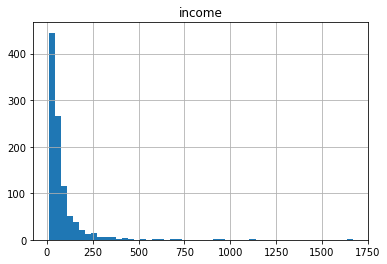

In [7]:
#Explore our data
data.hist(column = 'income', bins=50)

In [8]:
#Let's define the feature sets, X
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [10]:
X = data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [11]:
#Labels
y = data['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [12]:
#Data Normalization
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [14]:
#Classification using KNN
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#Train
k = 4
neighbor = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neighbor

KNeighborsClassifier(n_neighbors=4)

In [17]:
#Predict
yhat = neighbor.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [19]:
#Accuracy Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbor.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [20]:
#Practice Exercise
k = 6
neighbor2 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neighbor2

KNeighborsClassifier(n_neighbors=6)

In [21]:
#Predict
yhat2 = neighbor2.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [22]:
#Accuracy Evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbor2.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy: 0.32


In [40]:
#We can iteratively check the accuracy of the model for different values of K
Ks = 40
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1,Ks):
    #Train and predict
    neighbor3 = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neighbor3.predict(X_test)
    print("Train Accuracy: ", metrics.accuracy_score(y_train, neighbor3.predict(X_train)))
    print("Test Accuracy: ", metrics.accuracy_score(y_test, yhat))
    print("================================")
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

Train Accuracy:  1.0
Test Accuracy:  0.3
Train Accuracy:  0.6175
Test Accuracy:  0.29
Train Accuracy:  0.56875
Test Accuracy:  0.315
Train Accuracy:  0.5475
Test Accuracy:  0.32
Train Accuracy:  0.5375
Test Accuracy:  0.315
Train Accuracy:  0.51625
Test Accuracy:  0.31
Train Accuracy:  0.5125
Test Accuracy:  0.335
Train Accuracy:  0.4925
Test Accuracy:  0.325
Train Accuracy:  0.5025
Test Accuracy:  0.34
Train Accuracy:  0.4875
Test Accuracy:  0.33
Train Accuracy:  0.47625
Test Accuracy:  0.315
Train Accuracy:  0.47375
Test Accuracy:  0.34
Train Accuracy:  0.465
Test Accuracy:  0.33
Train Accuracy:  0.46625
Test Accuracy:  0.315
Train Accuracy:  0.45
Test Accuracy:  0.34
Train Accuracy:  0.45375
Test Accuracy:  0.36
Train Accuracy:  0.4625
Test Accuracy:  0.355
Train Accuracy:  0.45625
Test Accuracy:  0.35
Train Accuracy:  0.45125
Test Accuracy:  0.345
Train Accuracy:  0.46625
Test Accuracy:  0.335
Train Accuracy:  0.45875
Test Accuracy:  0.35
Train Accuracy:  0.46125
Test Accuracy:  0.

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385, 0.395, 0.395, 0.38 , 0.37 , 0.365, 0.385,
       0.395, 0.41 , 0.395])

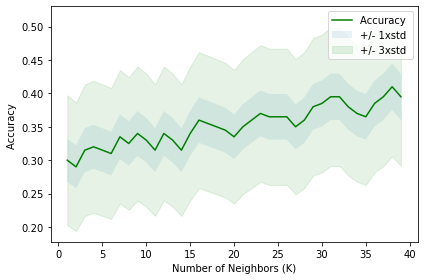

In [41]:
#Plot can visualize our results more clearly
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10, color = 'green')
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [42]:
print("Thhe best accuracy was with", mean_acc.max(), "with k = ", mean_acc.argmax()+1)

Thhe best accuracy was with 0.41 with k =  38
